# Second SDMS Assignment
## Deadine: 17/05/23
[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/guglielmopadula/StochasticModelling2022-2023/blob/main/SecondAssignment.ipynb)

- Send your assignment to my email: guglielmo.padula@studenti.units.it before the 00:00 AM of the day after the deadiline.

## Exercise 1
Let $X_{t}$ a DTMC with stochastic matrix $A= \begin{bmatrix} 0 & 1 & 0 & 0 &0  \\  \frac{a}{a+b} & 0 & \frac{b}{a+b} & 0 & 0 \\ 0 & \frac{a}{a+b} & 0 & \frac{b}{a+b} & 0 \\ 0 & 0 & \frac{a}{a+b} & 0 & \frac{b}{a+b} \\ 0 & 0 & 0 & 1 & 0 \end{bmatrix}$ with $a=3, b=2$.
- Prove that it is irreducible
- Prove with probability simulation and with eigenvalues analysis that the DTMC has only a stationary distribution howewer that there is no convergence to that probability.
- Prove that there can't be trajectory convergence and simulate some trajectories

## Exercise 2

Let $Y_{t}$ a (birth death) CTMC with rate matrix $A= \begin{bmatrix} -b & b & 0 & 0 &0  \\  a & -{a-b} & {b} & 0 & 0 \\ 0 & a & -a-b & b & 0 \\ 0 & 0 & a & -a-b & b \\ 0 & 0 & 0 & a & -a \end{bmatrix}$ with $a=3, b=2$.

Remember that if $\lambda_{i}=q_{i,i+1}$ and $\mu_{i}=q_{i,i-1}$, $i=0,...,N-1$ then the stationary distribution $\pi$ has values
$\pi_1=\frac{1}{1+\sum_{k=1}^\infty\prod_{i=1}^{k}\frac{\lambda_{i-1}}{\mu_i}}$  and 
$\pi_k=\pi_0\prod_{i=1}^k\frac{\lambda_{i-1}}{\mu_i},\quad k=1,\ldots,N-1$

- Calculate the stationary distribution of the CTMC.
- Prove with probability simulation and with eigenvalues analysis that the CTMC converges to that stationary distribution.
- Simulate some trajectories 

## Exercise 3 (optional)
What is the relation between $Y_{t}$ and $X_{t}$?

## Solution
### EX 1

In [11]:
import numpy as np
import pydtmc as mc
import scipy as sp
import matplotlib.pyplot as plt

In [2]:
A = np.array([[0,1,0,0,0],
              [3/5,0,2/5,0,0],
              [0,3/5,0,2/5,0],
              [0,0,3/5,0,2/5],
              [0,0,0,1,0]])

In [3]:
X = mc.MarkovChain(A)

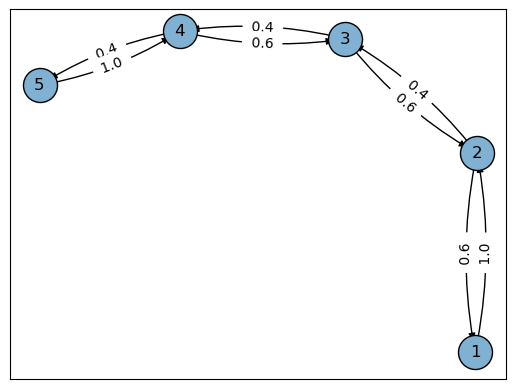

In [8]:
plt.ion()
mc.plot_graph(X)

Since the graph representing the chain is strongly connected, the chain is irreducible.

The eigenvalues and (left) eigenvectors may be computed with `scipy.linalg.eig()`.

In [83]:
eigval, eigvec = sp.linalg.eig(A,left=True,right = False)

In [84]:
print(eigval)

[-1.00000000e+00+0.j -6.92820323e-01+0.j -6.28952935e-17+0.j
  1.00000000e+00+0.j  6.92820323e-01+0.j]


We can see that as expected one eigenvalue is equal to one and that there is one eigenvalue equal to -1. Since we have an eigenvalue whose modulus is not strictly smaller than one, we do not expect convergence of the probability distribution to a limit distribution and instead we expect an oscillatory behaviour. In fact, we can check that for large $n$, even and odd powers of $A$ tend to different values.

In [89]:
print(f"Even powers converge to: \n\n{np.linalg.matrix_power(A,20)}\n")
print(f"Odd powers converge to: \n\n{np.linalg.matrix_power(A,21)}")


Even powers converge to: 

[[0.41563433 0.         0.46145522 0.         0.12291045]
 [0.         0.69250746 0.         0.30749254 0.        ]
 [0.4153097  0.         0.46156343 0.         0.12312687]
 [0.         0.69185821 0.         0.30814179 0.        ]
 [0.41482276 0.         0.46172575 0.         0.12345149]]

Odd powers converge to: 

[[0.         0.69250746 0.         0.30749254 0.        ]
 [0.41550448 0.         0.46149851 0.         0.12299702]
 [0.         0.69224776 0.         0.30775224 0.        ]
 [0.41511493 0.         0.46162836 0.         0.12325672]
 [0.         0.69185821 0.         0.30814179 0.        ]]


Nonetheless, the chain has an invariant distribution, which is the eigenvector of the eigenvalue 1. We can easily find such distribution as

In [90]:
pi = eigvec[:,3]
pi /= np.sum(pi) #normalising
print(pi)

[0.20769231 0.34615385 0.23076923 0.15384615 0.06153846]


With a simple simulation we can check that this distribution is in fact invariant

In [91]:
for n in range(25):
    pi = pi@A
print(pi)

[0.20769231 0.34615385 0.23076923 0.15384615 0.06153846]


Whereas if we start from an arbitrary distribution we do not obtain convergence, but instead the distribution oscillates between two possible values.

In [95]:
p = np.array([0,0.1,0.2,0.3,0.4])
for n in range(1,25):
    p = p@A
print(p)

p = np.array([0,0.1,0.2,0.3,0.4])
for n in range(1,26):
    p = p@A
print(p)

[0.24917554 0.27689661 0.27694149 0.12310339 0.07388298]
[0.16613797 0.41534043 0.18462068 0.18465957 0.04924136]


Since there is no convergence in probability, we can't have convergence in trajectories. In particular, from the analysis of the powers of the stochastic matrix, we conclude that each state is periodic of period 2, hence we do not have convergence towards a specific state.

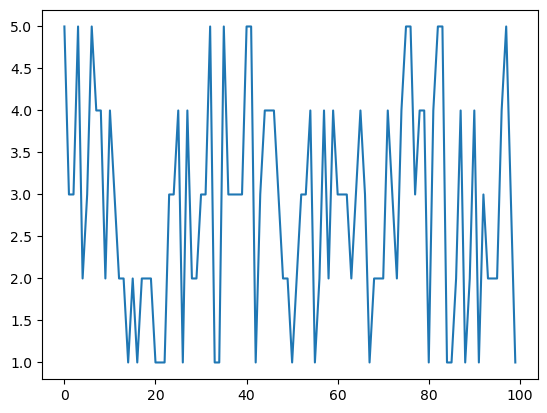

In [101]:
N = 100
p = np.array([0,0.1,0.2,0.3,0.4])
X = np.empty(N)
for n in range(N):
    X[n] = np.random.choice([1,2,3,4,5],1,p = p)
    p = p@A
plt.plot(range(N),X)